In [11]:
import zipfile
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier, plot_importance

# Getting the Data

Link of the dataset - https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
!kaggle datasets download -d uciml/pima-indians-diabetes-database

404 - Not Found


In [ ]:
# extract the files in temp folder
with zipfile.ZipFile("pima-indians-diabetes-database.zip", 'r') as zip_ref:
    zip_ref.extractall('temp')

In [2]:
df = pd.read_csv('../temp/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']

In [4]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=seed)

In [22]:
model = XGBClassifier(use_label_encoder=False)

In [23]:
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.60697
[1]	validation_0-logloss:0.56261
[2]	validation_0-logloss:0.53835
[3]	validation_0-logloss:0.52276
[4]	validation_0-logloss:0.51074
[5]	validation_0-logloss:0.50890
[6]	validation_0-logloss:0.50851
[7]	validation_0-logloss:0.51019
[8]	validation_0-logloss:0.51279
[9]	validation_0-logloss:0.52036
[10]	validation_0-logloss:0.52229
[11]	validation_0-logloss:0.52651
[12]	validation_0-logloss:0.52992
[13]	validation_0-logloss:0.53040
[14]	validation_0-logloss:0.54070
[15]	validation_0-logloss:0.54597


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

**NOTE** By default, the predictions made by XGBoost are probabilities.

In [24]:
y_pred = model.predict(X_test)
pred = [round(c) for c in y_pred]

In [25]:
accuracy = accuracy_score(y_test, pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.23%


In [26]:
model.score(X_test, y_test)

0.7322834645669292

## Plot Feature Importances of the model

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

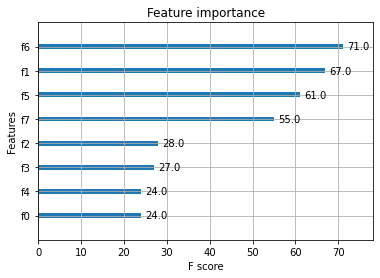

In [12]:
plot_importance(model)